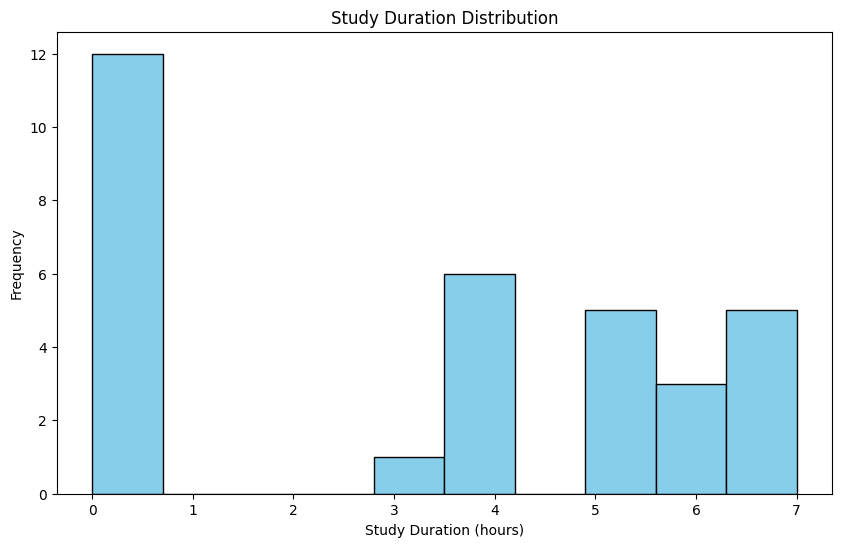

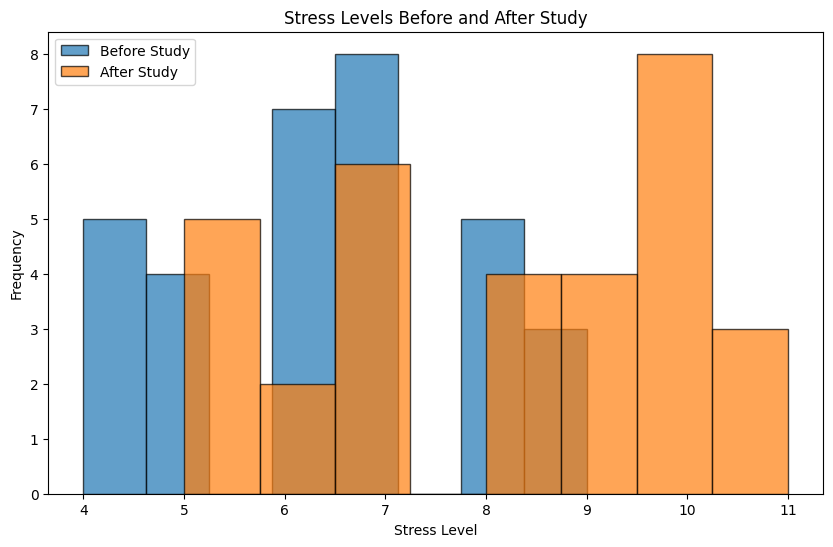

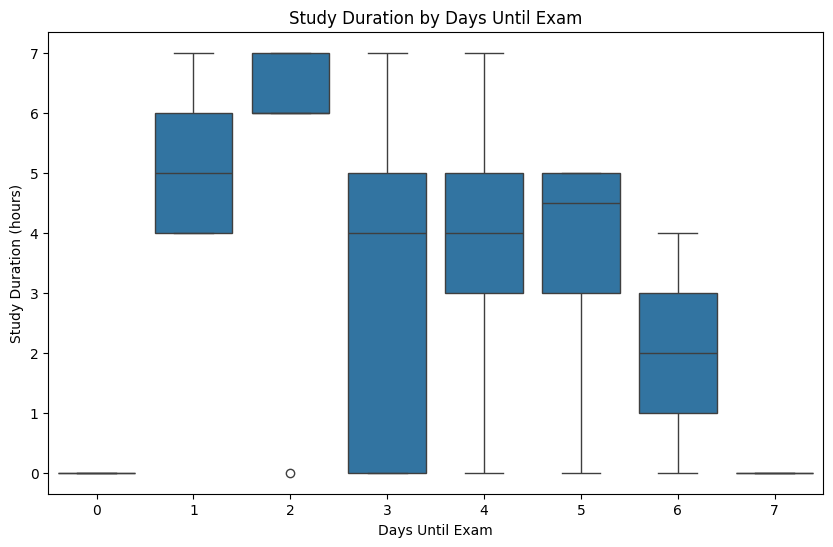

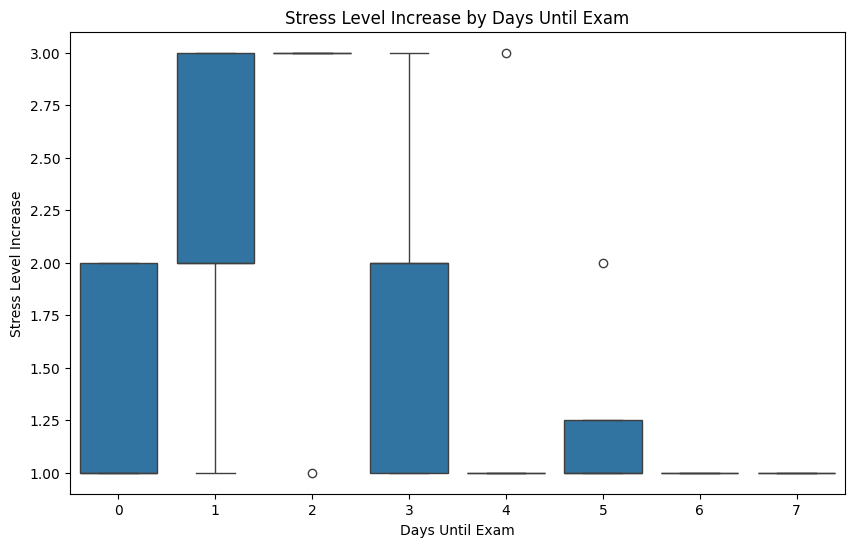

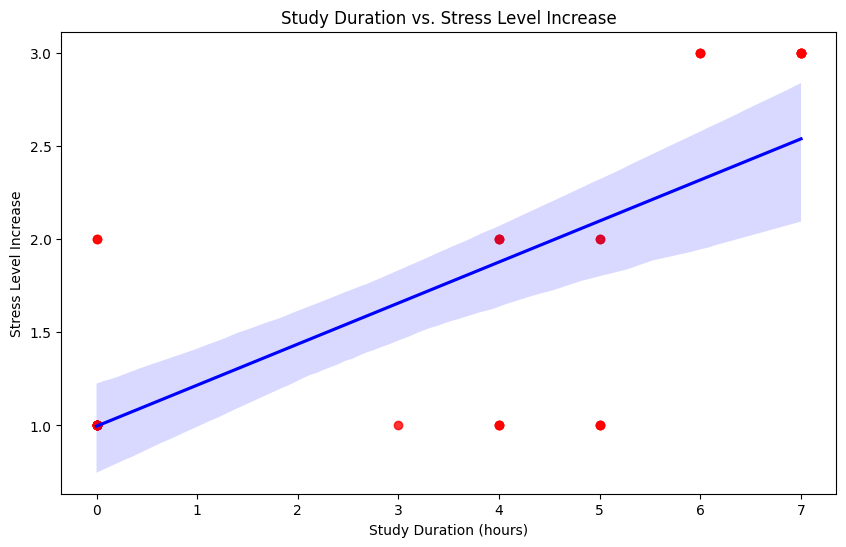

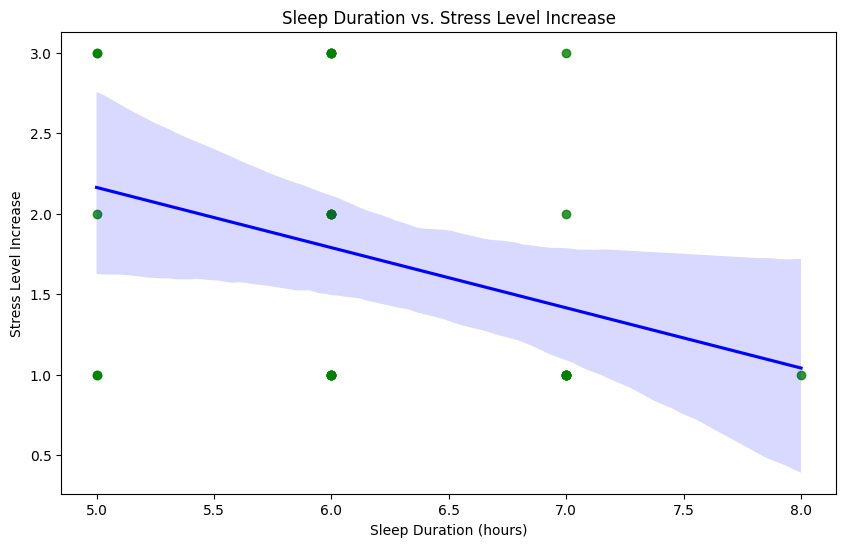

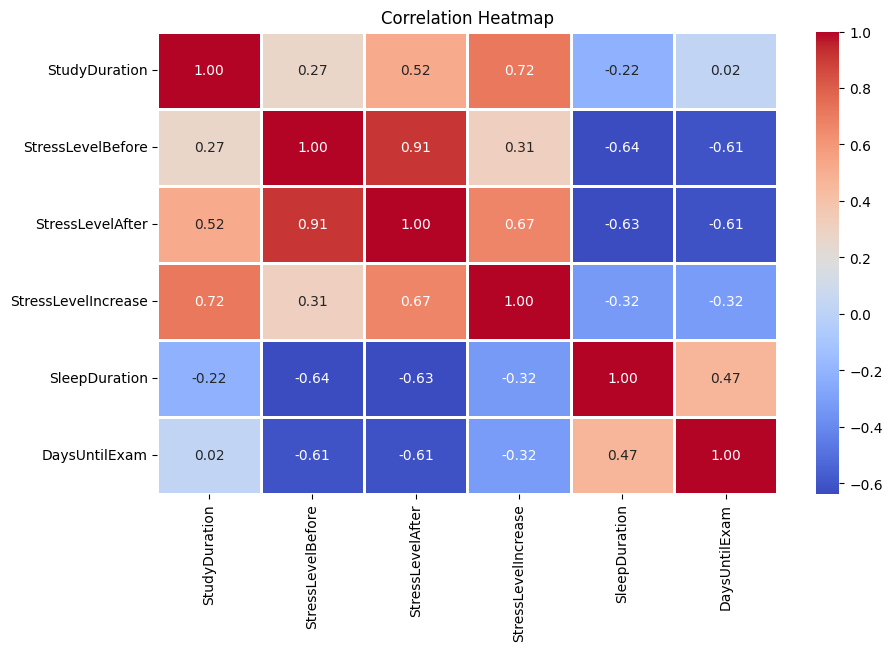

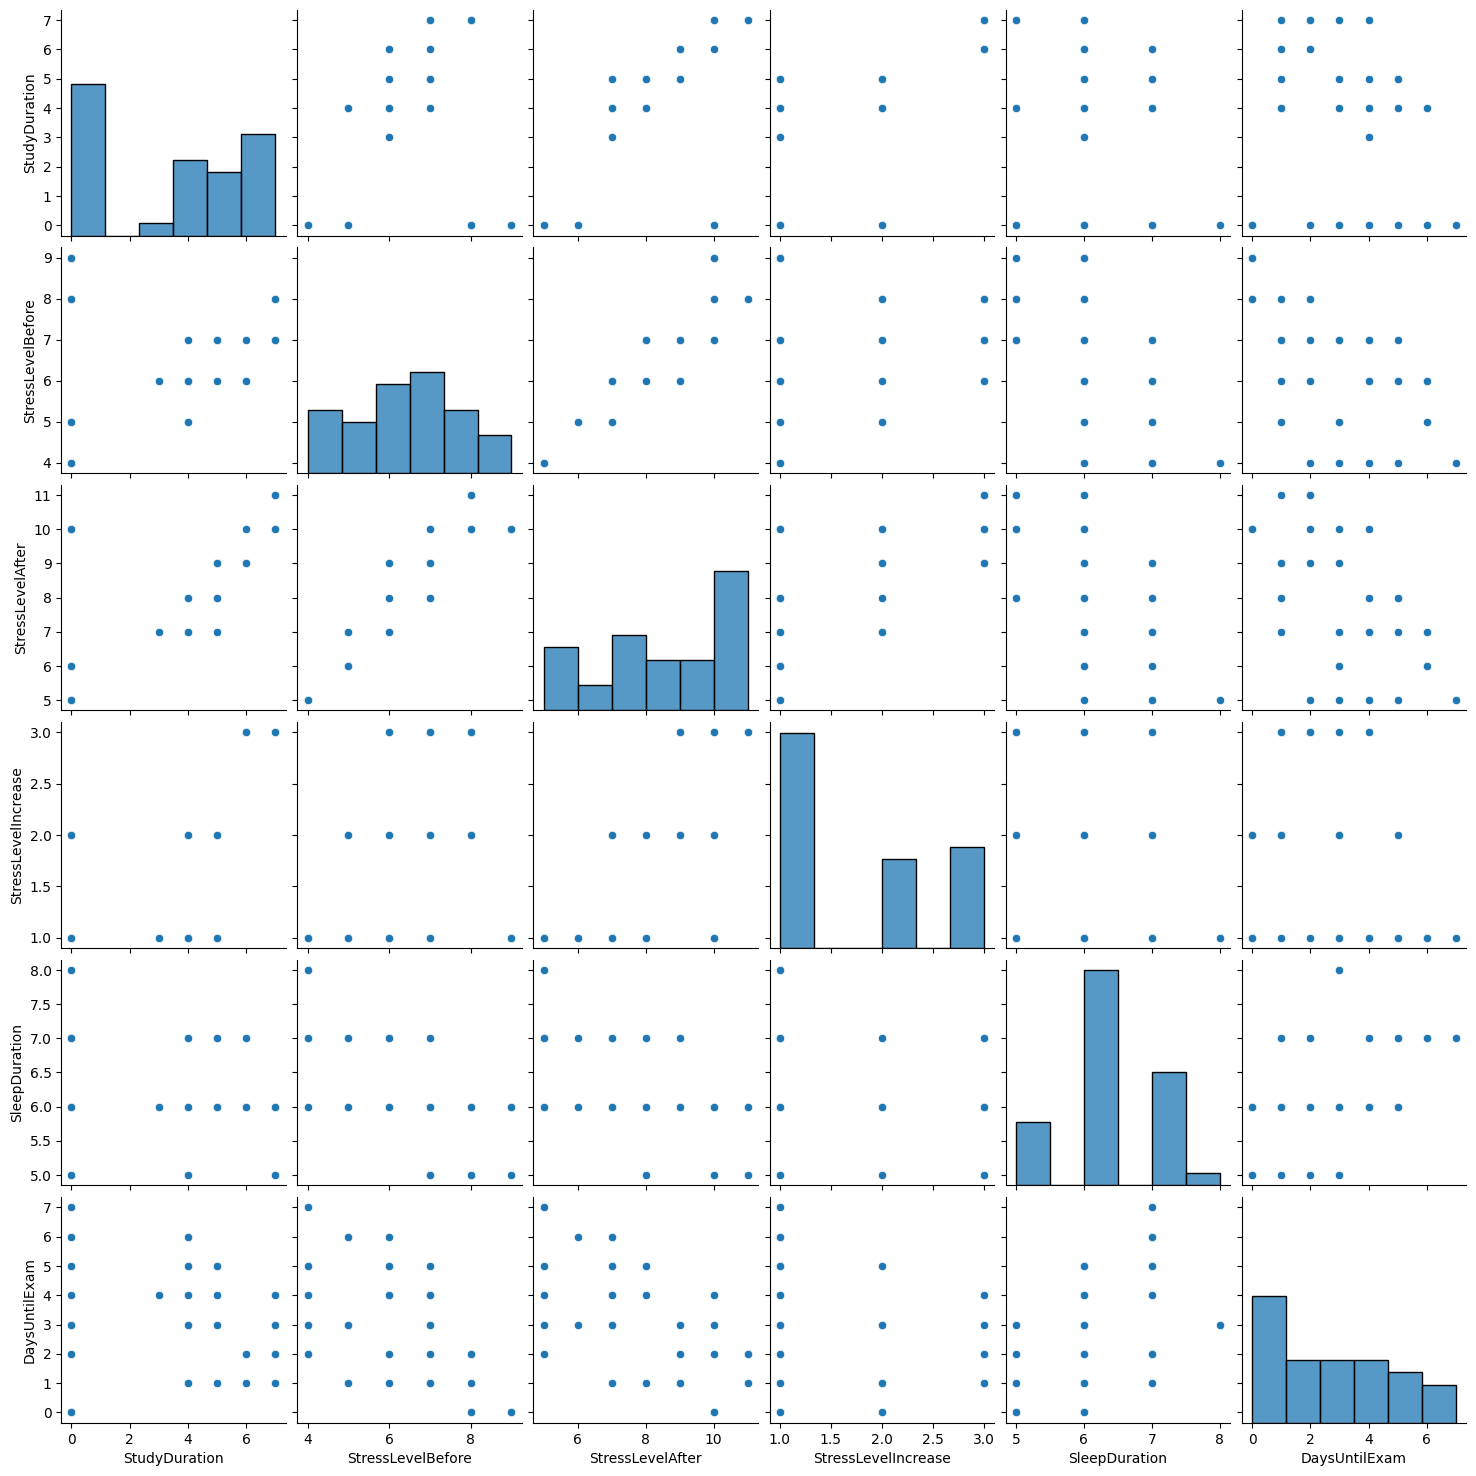

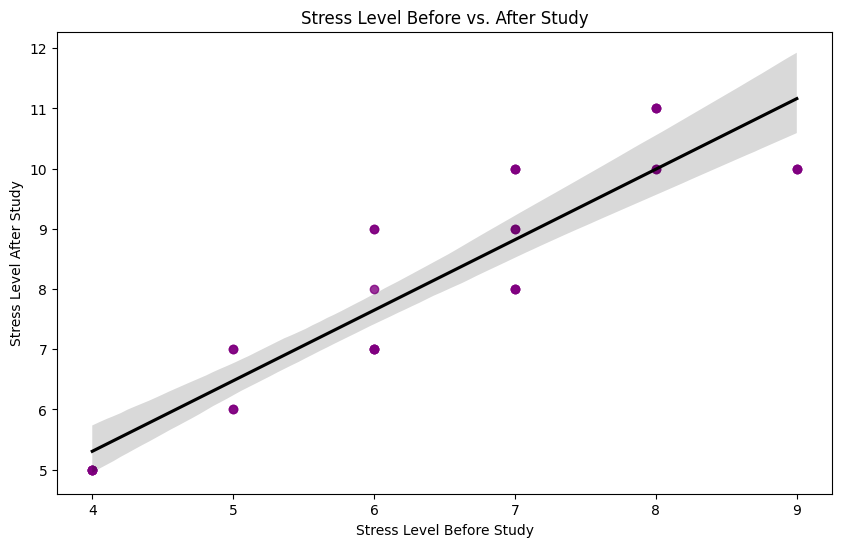

                            OLS Regression Results                            
Dep. Variable:       StressLevelAfter   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     18.01
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           8.23e-06
Time:                        20:33:17   Log-Likelihood:                -53.834
No. Observations:                  32   AIC:                             113.7
Df Residuals:                      29   BIC:                             118.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.3101      2.205      7.395

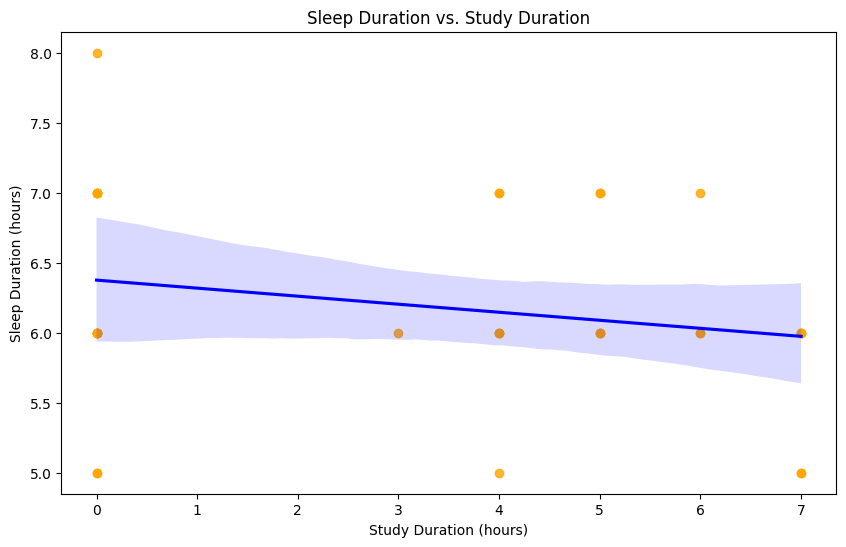

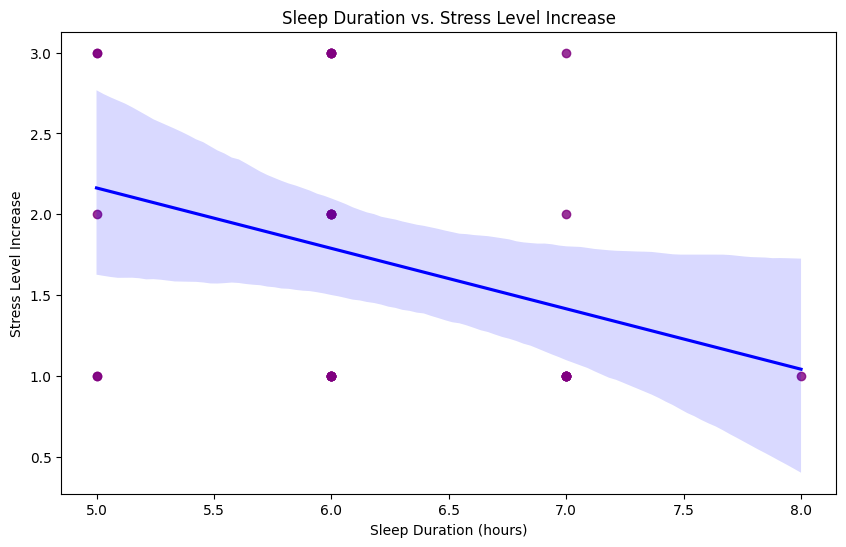

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

# Load the data from the Excel file
df = pd.read_excel('stresslevel.xlsx')

# Convert relevant columns to appropriate numeric values
df['StudyDuration'] = pd.to_numeric(df['StudyDuration'], errors='coerce')
df['StressLevelBefore'] = pd.to_numeric(df['StressLevelBefore'], errors='coerce')
df['StressLevelAfter'] = pd.to_numeric(df['StressLevelAfter'], errors='coerce')
df['StressLevelIncrease'] = pd.to_numeric(df['StressLevelIncrease'], errors='coerce')
df['SleepDuration'] = pd.to_numeric(df['SleepDuration'], errors='coerce')
df['DaysUntilExam'] = pd.to_numeric(df['DaysUntilExam'], errors='coerce')

# Drop rows with any missing values for analysis
df.dropna(subset=['StudyDuration', 'StressLevelBefore', 'StressLevelAfter', 'StressLevelIncrease', 'SleepDuration', 'DaysUntilExam'], inplace=True)

# 1. Adjusted Histogram for Study Duration
plt.figure(figsize=(10, 6))
plt.hist(df['StudyDuration'], bins=10, edgecolor='black', color='skyblue')
plt.title('Study Duration Distribution')
plt.xlabel('Study Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# 2. Adjusted Histogram for Stress Levels Before and After Study
plt.figure(figsize=(10, 6))
plt.hist(df['StressLevelBefore'], bins=8, edgecolor='black', alpha=0.7, label='Before Study')
plt.hist(df['StressLevelAfter'], bins=8, edgecolor='black', alpha=0.7, label='After Study')
plt.title('Stress Levels Before and After Study')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 3. Boxplot for Study Duration by Exam Proximity (DaysUntilExam)
plt.figure(figsize=(10, 6))
sns.boxplot(x='DaysUntilExam', y='StudyDuration', data=df)
plt.title('Study Duration by Days Until Exam')
plt.xlabel('Days Until Exam')
plt.ylabel('Study Duration (hours)')
plt.show()

# 4. Boxplot for Stress Level Increase by Days Until Exam
plt.figure(figsize=(10, 6))
sns.boxplot(x='DaysUntilExam', y='StressLevelIncrease', data=df)
plt.title('Stress Level Increase by Days Until Exam')
plt.xlabel('Days Until Exam')
plt.ylabel('Stress Level Increase')
plt.show()

# 5. Scatter plot with trendline for Study Duration and Stress Level Increase
plt.figure(figsize=(10, 6))
sns.regplot(x='StudyDuration', y='StressLevelIncrease', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Study Duration vs. Stress Level Increase')
plt.xlabel('Study Duration (hours)')
plt.ylabel('Stress Level Increase')
plt.show()

# 6. Scatter plot with trendline for Sleep Duration and Stress Level Increase
plt.figure(figsize=(10, 6))
sns.regplot(x='SleepDuration', y='StressLevelIncrease', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'blue'})
plt.title('Sleep Duration vs. Stress Level Increase')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level Increase')
plt.show()

# 7. Correlation Heatmap for all numeric variables
corr_matrix = df[['StudyDuration', 'StressLevelBefore', 'StressLevelAfter', 'StressLevelIncrease', 'SleepDuration', 'DaysUntilExam']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

# 8. Pairplot to visualize the relationships between all numeric variables
sns.pairplot(df[['StudyDuration', 'StressLevelBefore', 'StressLevelAfter', 'StressLevelIncrease', 'SleepDuration', 'DaysUntilExam']])
plt.show()

# 9. Scatter plot with trendline for Stress Level Before and Stress Level After
plt.figure(figsize=(10, 6))
sns.regplot(x='StressLevelBefore', y='StressLevelAfter', data=df, scatter_kws={'color': 'purple'}, line_kws={'color': 'black'})
plt.title('Stress Level Before vs. After Study')
plt.xlabel('Stress Level Before Study')
plt.ylabel('Stress Level After Study')
plt.show()

# 10. Regression Analysis: Predicting Stress Level After using Study Duration and Sleep Duration
X = df[['StudyDuration', 'SleepDuration']]
X = sm.add_constant(X)  # Adding constant to the model
y = df['StressLevelAfter']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# 11. Scatter Plot with Trendline for Sleep Duration vs. Study Duration
plt.figure(figsize=(10, 6))
sns.regplot(x='StudyDuration', y='SleepDuration', data=df, scatter_kws={'color': 'orange'}, line_kws={'color': 'blue'})
plt.title('Sleep Duration vs. Study Duration')
plt.xlabel('Study Duration (hours)')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 12. Scatter Plot with Trendline for Sleep Duration vs. Stress Level Increase
plt.figure(figsize=(10, 6))
sns.regplot(x='SleepDuration', y='StressLevelIncrease', data=df, scatter_kws={'color': 'purple'}, line_kws={'color': 'blue'})
plt.title('Sleep Duration vs. Stress Level Increase')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level Increase')
plt.show()
